#Experiment 2: Comparison of the AutoDCE-TS Method with Other Multivariate Time Series Forecasting Methods

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

###**HEATMAP**

In [2]:
def plot_heatmap(df, name):
  cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["#21209C","#00AF91","#FF5200"])

  df.replace(['*', '**'], np.nan, inplace=True)

  for col in df.columns:
      df[col] = df[col].astype(float)

  df_normalized = df.copy()
  for col in df.columns:
      col_min = df[col].min()
      col_max = df[col].max()
      df_normalized[col] = (df[col] - col_min) / (col_max - col_min)

  plt.figure(figsize=(15, 10))
  ax = sns.heatmap(df_normalized[df.columns], annot=df[df.columns], cmap=cmap, linewidth=.5, annot_kws={"fontsize":12})
  plt.tick_params(axis='both', which='major', labelsize=12, labelbottom = False, bottom=False, top = False, labeltop=True)

  if name == 'CLIMATIC':
    ax.set_xticklabels(['\n 1 ',name+'_1 \n\n 15','\n 30','\n 1 ',name+'_2 \n\n 15','\n 30','\n 1 ',name+'_3 \n\n 15','\n 30'])
  else:
    ax.set_xticklabels(['\n 1 ',name+'_1 \n\n 15','\n 30','\n 1 ',name+'_2 \n\n 15','\n 30','\n 1 ',name+'_3 \n\n 15','\n 30', '\n 1 ',name+'_4 \n\n 15','\n 30', '\n 1 ',name+'_5 \n\n 15','\n 30'])

  plt.show()


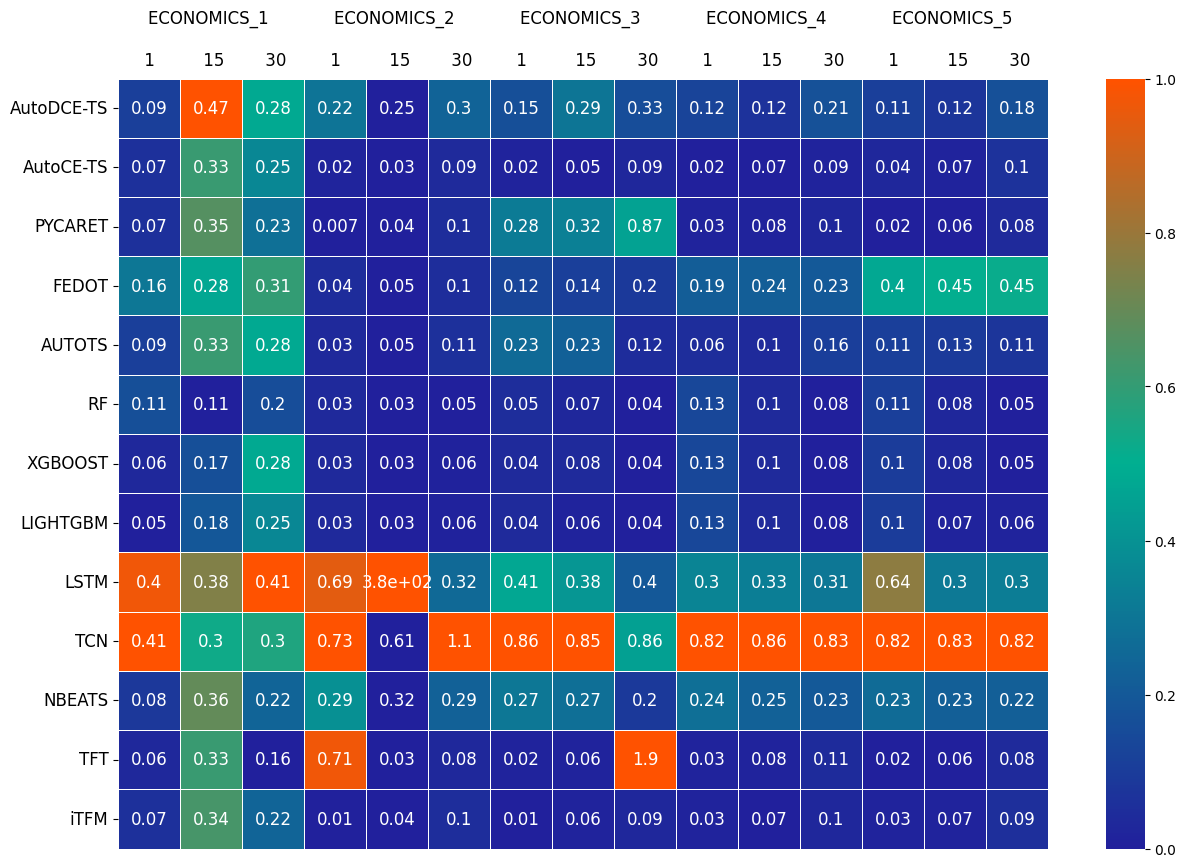

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/PatriciaLucas/AutoML/refs/heads/main/Results_paper_2/Experiment_2/economics.csv', index_col=0)
df = df.drop(columns=['Metric'])
plot_heatmap(df, 'ECONOMICS')

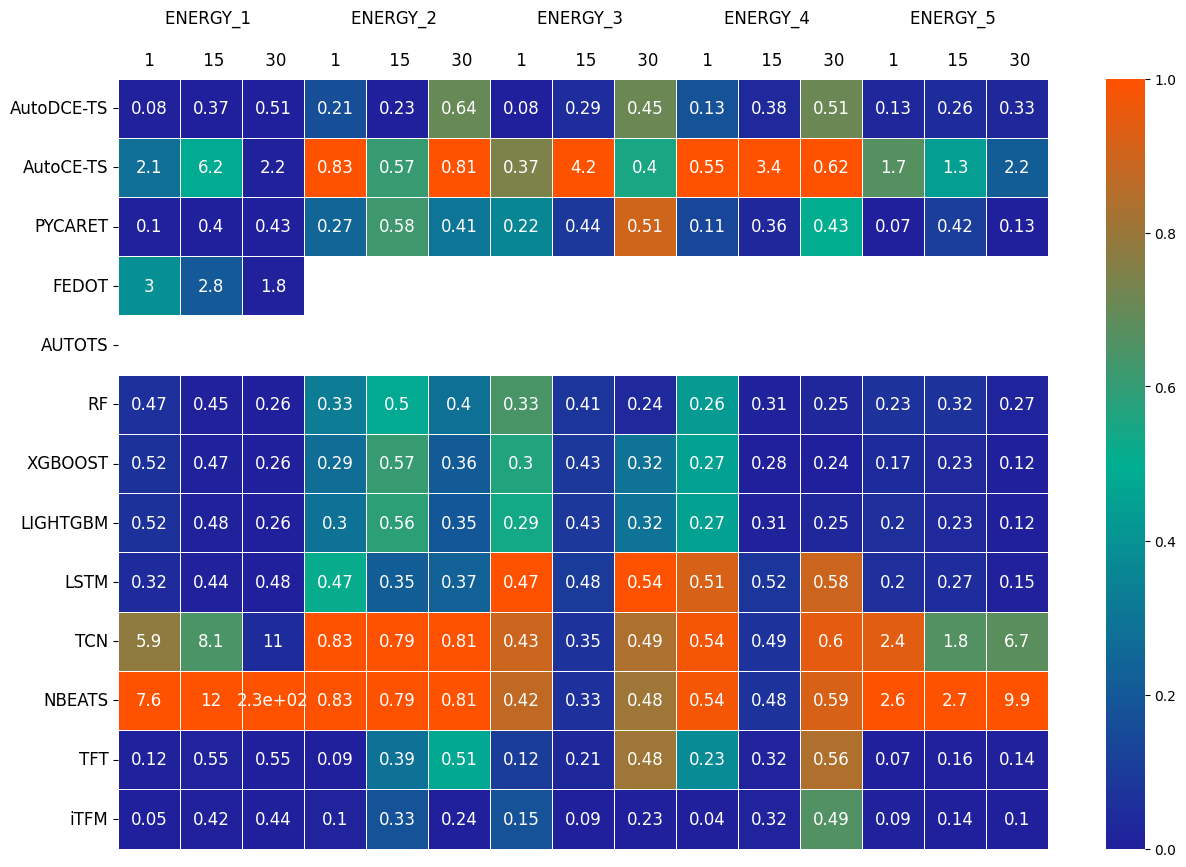

In [4]:
df = pd.read_csv('https://raw.githubusercontent.com/PatriciaLucas/AutoML/refs/heads/main/Results_paper_2/Experiment_2/energy.csv', index_col=0)
df = df.drop(columns=['Metric'])
plot_heatmap(df, 'ENERGY')

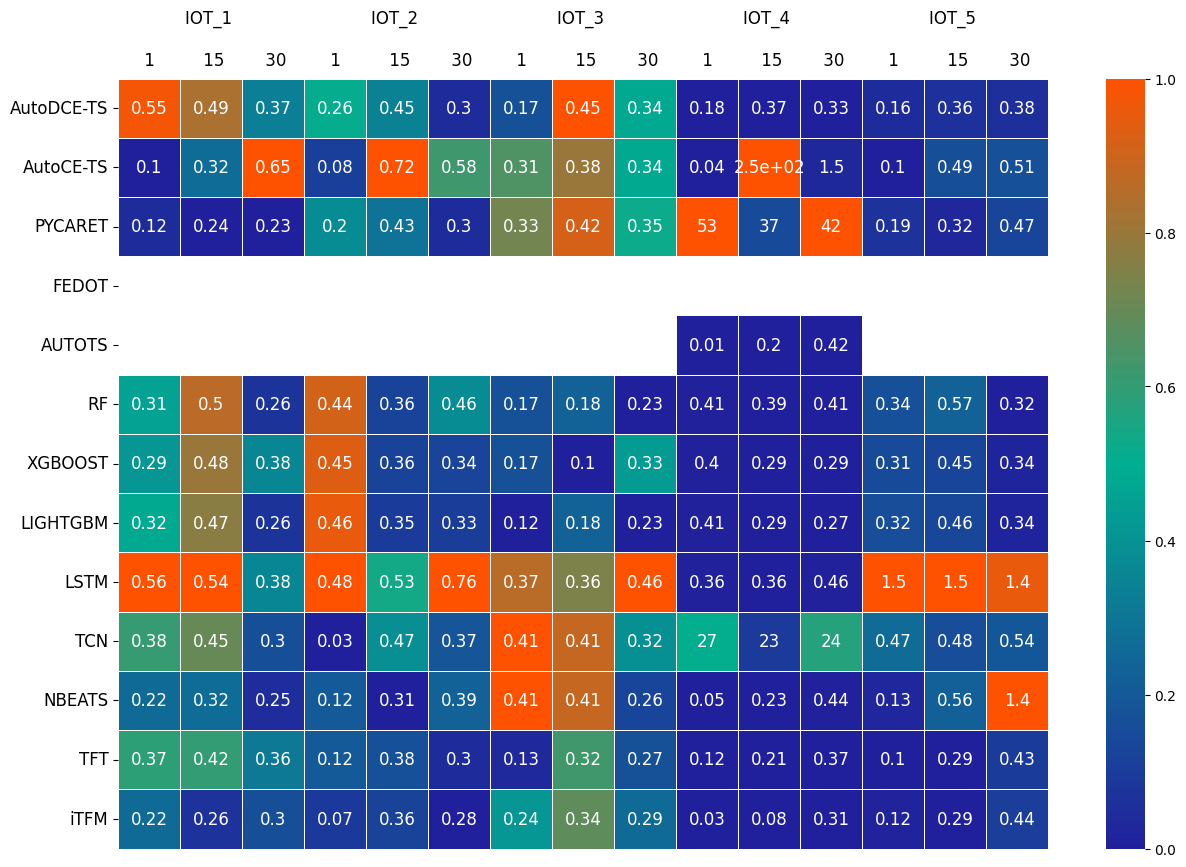

In [5]:
df = pd.read_csv('https://raw.githubusercontent.com/PatriciaLucas/AutoML/refs/heads/main/Results_paper_2/Experiment_2/iot.csv', index_col=0)
df = df.drop(columns=['Metric'])
plot_heatmap(df, 'IOT')

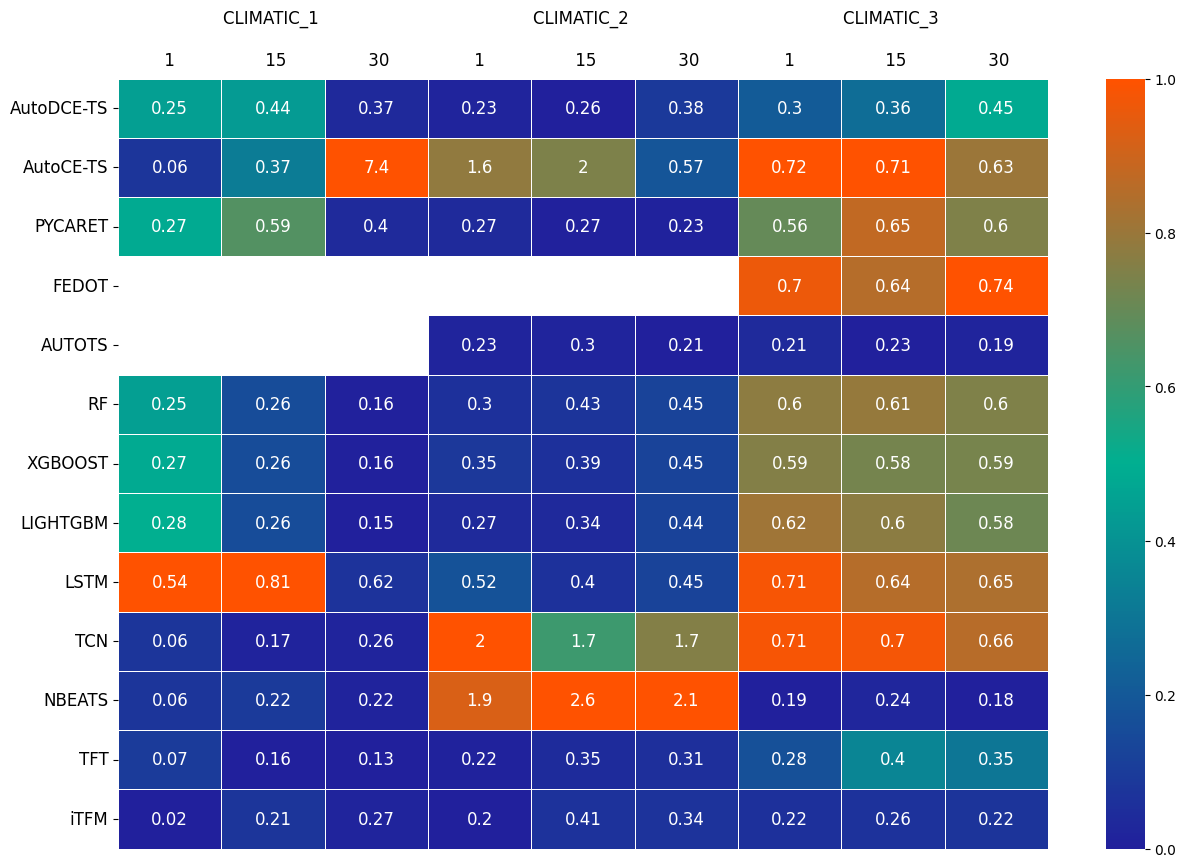

In [6]:
df = pd.read_csv('https://raw.githubusercontent.com/PatriciaLucas/AutoML/refs/heads/main/Results_paper_2/Experiment_2/climatic.csv', index_col=0)
df = df.drop(columns=['Metric'])
plot_heatmap(df, 'CLIMATIC')

###**Diagram of critical differences**

In [7]:
!pip install autorank

  Preparing metadata (setup.py) ... done
  Created wheel for baycomp: filename=baycomp-1.0.3-py3-none-any.whl size=18027 sha256=fc3267e6e3c483243e8ad25efde75930b50fb2a02180f18733dce9066cc68cfa
  Stored in directory: /root/.cache/pip/wheels/2b/a2/b8/9c0b9ffde746a4e0c20639b46eae34dda4e0588efebde8916e
Successfully built baycomp


In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from autorank import autorank, plot_stats, create_report, latex_table

In [16]:
df_eco = pd.read_csv('https://raw.githubusercontent.com/PatriciaLucas/AutoML/refs/heads/main/Results_paper_2/Experiment_2/economicsT.csv', index_col=0)
df_en = pd.read_csv('https://raw.githubusercontent.com/PatriciaLucas/AutoML/refs/heads/main/Results_paper_2/Experiment_2/energyT.csv', index_col=0)
df_iot = pd.read_csv('https://raw.githubusercontent.com/PatriciaLucas/AutoML/refs/heads/main/Results_paper_2/Experiment_2/iotT.csv', index_col=0)
df_clima = pd.read_csv('https://raw.githubusercontent.com/PatriciaLucas/AutoML/refs/heads/main/Results_paper_2/Experiment_2/climaticT.csv', index_col=0)
df_eco.index = ['ECONOMICS'] * len(df_eco)
df_en.index = ['ENERGY'] * len(df_en)
df_iot.index = ['IOT'] * len(df_iot)
df_clima.index = ['CLIMATIC'] * len(df_clima)
df = pd.concat([df_eco,df_en,df_iot,df_clima])

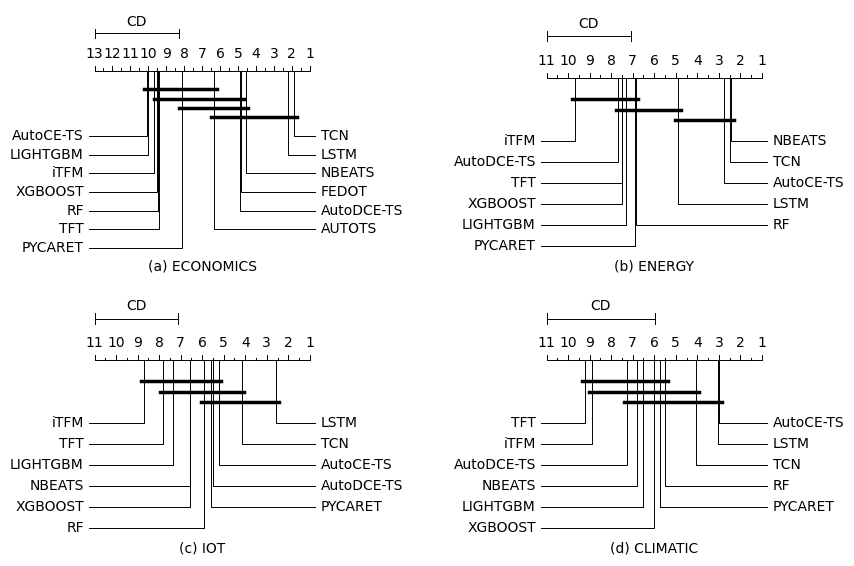

In [11]:
fig, axes = plt.subplots(2,2, figsize=(10,7), dpi=100)
plt.subplots_adjust(wspace=0.4,
                    hspace=0.1)
names = ['ECONOMICS','ENERGY','IOT','CLIMATIC']
letra = ['(a)','(b)','(c)','(d)']

l = 0
for name, ax in zip(names, axes.flatten()):
  if name == 'ECONOMICS':
    df_rank = df_eco
  elif name == 'ENERGY':
    df_rank = df_en
  elif name == 'IOT':
    df_rank = df_iot
  else:
    df_rank = df_clima
  res = autorank(df_rank, alpha=0.05, verbose=False)
  b = plot_stats(res, allow_insignificant=True, ax=ax)
  ax.text(0.5, 1, letra[l]+" "+name, ha='center', va='center', fontsize=10)
  l = l+1

####**Test reports for ECONOMICS**

In [12]:
df_rank = df_eco
res = autorank(df_rank, alpha=0.05, verbose=False)
print(res)
create_report(res)

RankResult(rankdf=
             meanrank  median   mad ci_lower ci_upper effect_size   magnitude
AutoCE-TS   10.066667    0.07  0.03     0.02     0.33         0.0  negligible
LIGHTGBM    10.000000    0.06  0.02     0.03     0.25    0.264557       small
iTFM         9.700000    0.07  0.03     0.01     0.34         0.0  negligible
XGBOOST      9.533333    0.08  0.03     0.03     0.28    -0.22483       small
RF           9.466667    0.08  0.03     0.03      0.2    -0.22483       small
TFT          9.400000    0.08  0.05     0.02     1.87   -0.163588  negligible
PYCARET      8.133333    0.08  0.05    0.007     0.87   -0.163588  negligible
AUTOTS       6.333333    0.11  0.05     0.03     0.33   -0.654352      medium
AutoDCE-TS   4.900000    0.21  0.09     0.09     0.47    -1.40766       large
FEDOT        4.833333    0.20  0.08     0.04     0.45   -1.451353       large
NBEATS       4.566667    0.24  0.03     0.08     0.36   -3.822114       large
LSTM         2.200000    0.38  0.06      0.3 

####**Test reports for ENERGY**

In [13]:
df_rank = df_en
res = autorank(df_rank, alpha=0.05, verbose=False)
print(res)
create_report(res)

RankResult(rankdf=
            meanrank  median   mad ci_lower ci_upper effect_size   magnitude
iTFM        9.700000    0.15  0.09     0.04     0.49         0.0  negligible
AutoDCE-TS  7.666667    0.29  0.16     0.08     0.64   -0.727452      medium
XGBOOST     7.500000    0.29  0.06     0.12     0.57     -1.2346       large
TFT         7.500000    0.23  0.14     0.07     0.56   -0.458502       small
LIGHTGBM    7.300000    0.30  0.05     0.12     0.56   -1.389726       large
PYCARET     6.900000    0.40  0.11     0.07     0.58   -1.677858       large
RF          6.866667    0.32  0.07     0.23      0.5   -1.422225       large
LSTM        4.900000    0.47  0.07     0.15     0.58   -2.677129       large
AutoCE-TS   2.766667    1.27  0.87     0.37     6.21   -1.221457       large
TCN         2.466667    0.81  0.38     0.35    10.83    -1.61213       large
NBEATS      2.433333    0.81  0.39     0.33   233.96   -1.572909       large
pvalue=8.254141508264856e-14
cd=3.8980618135814495
omnibu

####**Test reports for IOT**

In [14]:
df_rank = df_iot
res = autorank(df_rank, alpha=0.05, verbose=False)
print(res)
create_report(res)

RankResult(rankdf=
            meanrank  median   mad ci_lower ci_upper effect_size   magnitude
iTFM        8.700000    0.28  0.06     0.03     0.44         0.0  negligible
TFT         7.833333    0.30  0.08      0.1     0.43   -0.190775  negligible
LIGHTGBM    7.333333    0.32  0.06     0.12     0.47   -0.449661       small
NBEATS      6.566667    0.31   0.1     0.05     1.45   -0.245382       small
XGBOOST     6.566667    0.34  0.05      0.1     0.48   -0.732786      medium
RF          5.933333    0.36  0.08     0.17     0.57   -0.763099      medium
PYCARET     5.600000    0.33   0.1     0.12    52.61    -0.40897       small
AutoDCE-TS  5.500000    0.36  0.09     0.16     0.55   -0.705485      medium
AutoCE-TS   5.233333    0.38  0.27     0.04   246.32   -0.344874       small
TCN         4.166667    0.45  0.08     0.03    26.57   -1.621586       large
LSTM        2.566667    0.48  0.11     0.36      1.5   -1.522549       large
pvalue=1.5691006763519513e-05
cd=3.8980618135814495
omnib

####**Test reports for CLIMATIC**

In [15]:
df_rank = df_clima
res = autorank(df_rank, alpha=0.05, verbose=False)
print(res)
create_report(res)

RankResult(rankdf=
            meanrank  median   mad ci_lower ci_upper effect_size   magnitude
TFT         9.222222    0.28  0.07     0.07      0.4         0.0  negligible
iTFM        8.888889    0.22  0.04     0.02     0.41    0.709881      medium
AutoDCE-TS  7.277778    0.36  0.08     0.23     0.45   -0.717863      medium
NBEATS      6.777778    0.22  0.04     0.06     2.56    0.709881      medium
LIGHTGBM    6.500000    0.34   0.1     0.15     0.62   -0.468866       small
XGBOOST     6.000000    0.39  0.13     0.16     0.59   -0.710649      medium
PYCARET     5.722222    0.40  0.16     0.23     0.65   -0.655424      medium
RF          5.500000    0.43  0.17     0.16     0.61   -0.778259      medium
TCN         4.055556    0.70  0.53     0.06      2.0   -0.749392      medium
LSTM        3.055556    0.62  0.09      0.4     0.81    -2.84445       large
AutoCE-TS   3.000000    0.71  0.34     0.06     7.37   -1.181588       large
pvalue=0.0001025775860237528
cd=5.032376162162679
omnibus